import module

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.optimizers import Adam


from datetime import datetime

import math
from datetime import date, timedelta
import matplotlib.pyplot as plt




Load data

In [2]:
# Load data
data = pd.read_excel('RevenuePessengerDaily.xlsx')

data

,penghasilan_penumpang,tanggal,org,kode_org,des,kode_des
0,13755000,2022-12-09,TANJUNG PRIOK,431,NABIRE,982
1,10087000,2022-12-24,TANJUNG PRIOK,431,NABIRE,982
2,7336000,2023-01-07,TANJUNG PRIOK,431,NABIRE,982
3,15589000,2023-01-21,TANJUNG PRIOK,431,NABIRE,982
4,4585000,2023-02-04,TANJUNG PRIOK,431,NABIRE,982
...,...,...,...,...,...,...
85471,2980000,2023-05-11,AMBON,946,BAU-BAU,921
85472,3011000,2023-01-11,AMBON,946,BAU-BAU,921
85473,3011000,2023-03-31,AMBON,946,BAU-BAU,921
85474,3011000,2023-05-01,AMBON,946,BAU-BAU,921


In [3]:
grouped_data = data.groupby(['kode_org', 'kode_des']).size().reset_index(name='Count')
grouped_data

,kode_org,kode_des,Count
0,144,251,63
1,144,256,1156
2,144,266,145
3,144,431,344
4,246,251,28
...,...,...,...
847,983,971,46
848,983,972,1
849,983,976,40
850,983,977,28


In [4]:
grouped_data = data.groupby(['tanggal','kode_org', 'kode_des']).size().reset_index(name='Count')
grouped_data

,tanggal,kode_org,kode_des,Count
0,2022-12-01,251,431,2
1,2022-12-01,251,563,1
2,2022-12-01,251,683,1
3,2022-12-01,251,687,2
4,2022-12-01,251,688,2
...,...,...,...,...
11503,2023-06-10,942,946,1
11504,2023-06-10,946,563,1
11505,2023-06-11,946,431,1
11506,2023-06-11,946,563,1


In [5]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   11508 non-null  object
 1   kode_org  11508 non-null  int64 
 2   kode_des  11508 non-null  int64 
 3   Count     11508 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 359.8+ KB


In [6]:
data_sample = data[(data['kode_org'] == 144) & (data['kode_des'] == 256)]
data_sample

,penghasilan_penumpang,tanggal,org,kode_org,des,kode_des
81433,54672000,2022-12-06,BELAWAN,144,PULAU BATAM,256
81434,63036000,2022-12-13,BELAWAN,144,PULAU BATAM,256
81435,44268000,2022-12-19,BELAWAN,144,PULAU BATAM,256
81436,15300000,2022-12-20,BELAWAN,144,PULAU BATAM,256
81437,41616000,2022-12-21,BELAWAN,144,PULAU BATAM,256
...,...,...,...,...,...,...
82584,3312000,2023-04-24,BELAWAN,144,PULAU BATAM,256
82585,3680000,2023-01-24,BELAWAN,144,PULAU BATAM,256
82586,3801000,2023-04-24,BELAWAN,144,PULAU BATAM,256
82587,4048000,2023-01-07,BELAWAN,144,PULAU BATAM,256


In [7]:
data_sample_process = data_sample[['tanggal','penghasilan_penumpang']]
data_sample_process

,tanggal,penghasilan_penumpang
81433,2022-12-06,54672000
81434,2022-12-13,63036000
81435,2022-12-19,44268000
81436,2022-12-20,15300000
81437,2022-12-21,41616000
...,...,...
82584,2023-04-24,3312000
82585,2023-01-24,3680000
82586,2023-04-24,3801000
82587,2023-01-07,4048000


In [8]:
sorted_data = data_sample_process.sort_values(by='tanggal')
sorted_data

,tanggal,penghasilan_penumpang
81433,2022-12-06,54672000
81470,2022-12-06,1125000
82500,2022-12-06,2208000
81568,2022-12-06,373000
82110,2022-12-06,3672000
...,...,...
82211,2023-05-23,1356000
81468,2023-05-23,2652000
81627,2023-05-23,2448000
81469,2023-05-30,408000


In [9]:
summed_data = data_sample_process.groupby('tanggal').sum().reset_index()
summed_data



,tanggal,penghasilan_penumpang
0,2022-12-06,198098000
1,2022-12-13,268370000
2,2022-12-19,216548000
3,2022-12-20,52920000
4,2022-12-21,255979000
5,2022-12-24,264983000
6,2022-12-29,542589000
7,2023-01-04,390150000
8,2023-01-07,393365000
9,2023-01-09,601427000


In [10]:
summed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tanggal                37 non-null     object
 1   penghasilan_penumpang  37 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


visualisasi data

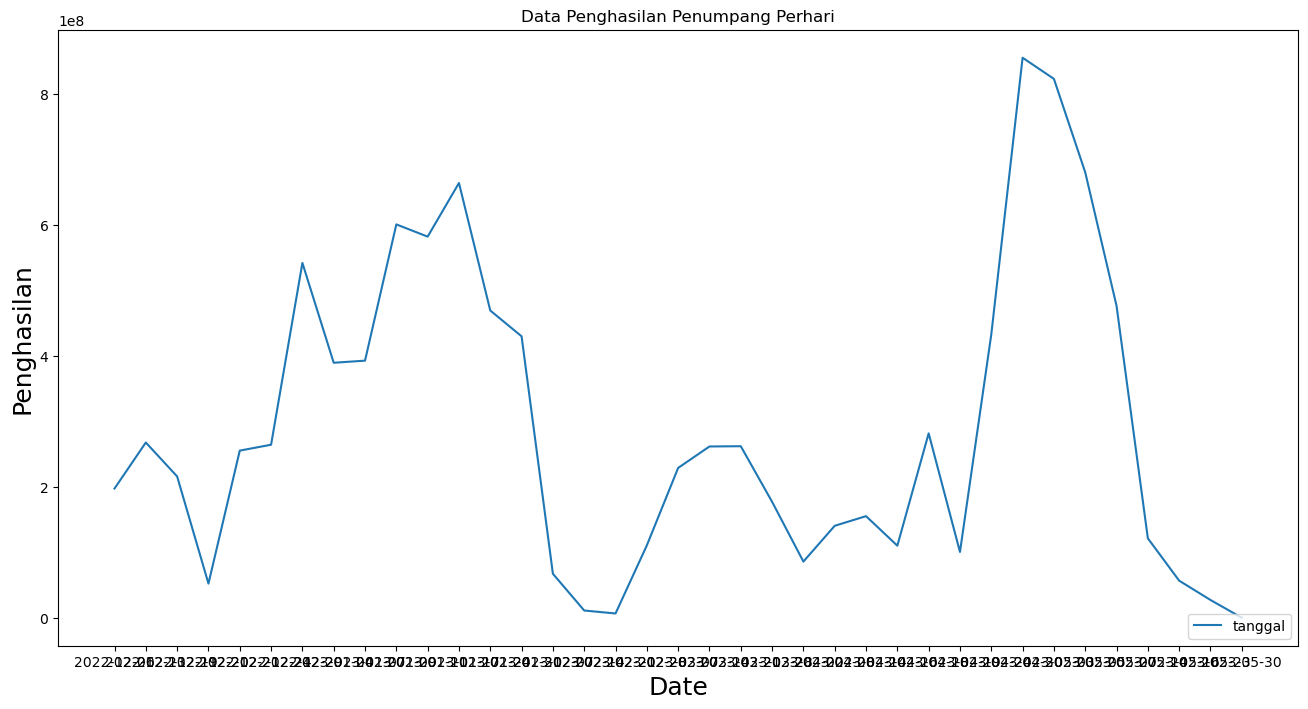

In [11]:
# plot the data

plt.figure(figsize=(16,8))
plt.title('Data Penghasilan Penumpang Perhari')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Penghasilan',fontsize=18)

plt.plot(summed_data['tanggal'],summed_data['penghasilan_penumpang'])

plt.legend (['tanggal','penghasilan_penumpang'],loc='lower right')

plt.show()


In [12]:
summed_data.head()

,tanggal,penghasilan_penumpang
0,2022-12-06,198098000
1,2022-12-13,268370000
2,2022-12-19,216548000
3,2022-12-20,52920000
4,2022-12-21,255979000


In [13]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(summed_data['penghasilan_penumpang'].values.reshape(-1, 1))
scaled_data


array([[0.23070599],
       [0.31288364],
       [0.25228184],
       [0.06093159],
       [0.29839333],
       [0.30892281],
       [0.63356149],
       [0.4552959 ],
       [0.4590556 ],
       [0.70236796],
       [0.68050093],
       [0.77628482],
       [0.54858424],
       [0.50250198],
       [0.07847994],
       [0.01287534],
       [0.00757435],
       [0.12914867],
       [0.2675276 ],
       [0.30579577],
       [0.30625653],
       [0.20700531],
       [0.10024523],
       [0.16415416],
       [0.18139613],
       [0.12864933],
       [0.32920059],
       [0.11742872],
       [0.50579741],
       [1.        ],
       [0.96224169],
       [0.7954306 ],
       [0.55702513],
       [0.14178662],
       [0.06617294],
       [0.03168316],
       [0.        ]])

In [14]:
# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.66)
test_size = len(scaled_data) - train_size
#train_data = scaled_data[:train_size]
#test_data = scaled_data[train_size:]
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]
test_data

array([[0.18139613],
       [0.12864933],
       [0.32920059],
       [0.11742872],
       [0.50579741],
       [1.        ],
       [0.96224169],
       [0.7954306 ],
       [0.55702513],
       [0.14178662],
       [0.06617294],
       [0.03168316],
       [0.        ]])

# Create input and target sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)



In [15]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [16]:
seq_length = 7
trainX, trainY = to_sequences(train_data, seq_length)
testX, testY = to_sequences(test_data, seq_length)

print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))
#print(testX)

Shape of training set: (16, 7)
Shape of test set: (5, 7)


#Bidirectional LSTM
#reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#For some sequence forecasting problems we may need LSTM to learn
# sequence in both forward and backward directions
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(None, seq_length)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
print('Train...')

##### BATAS CODE ######

In [17]:
# Build the model
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(seq_length, 1)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')



In [18]:
# Train the model
model.fit(trainX, trainY, epochs=10, batch_size=32)



Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.1480
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 0.1175
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0935
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0763
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0663
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0640
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0677
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0728
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0749
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0732


In [19]:
# Make predictions
train_predictions = model.predict(trainX)



1/1 [==============================] - 1s 993ms/step


In [20]:
train_predictions

array([[0.35854834],
       [0.38632873],
       [0.40859798],
       [0.461325  ],
       [0.52468926],
       [0.57622975],
       [0.59930354],
       [0.58926487],
       [0.54522747],
       [0.4857196 ],
       [0.40353325],
       [0.33730805],
       [0.28562334],
       [0.2652776 ],
       [0.25764176],
       [0.275766  ]], dtype=float32)

In [21]:
test_predictions = model.predict(testX)

1/1 [==============================] - 0s 17ms/step


In [22]:
test_predictions

array([[0.49281016],
       [0.5688801 ],
       [0.6172609 ],
       [0.5973199 ],
       [0.5711251 ]], dtype=float32)

In [23]:
# Inverse scaling
train_predictions = scaler.inverse_transform(train_predictions)
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
testY = scaler.inverse_transform(testY.reshape(-1, 1))

In [24]:
trainY

array([[3.90150e+08],
       [3.93365e+08],
       [6.01427e+08],
       [5.82728e+08],
       [6.64635e+08],
       [4.69923e+08],
       [4.30517e+08],
       [6.79260e+07],
       [1.18260e+07],
       [7.29300e+06],
       [1.11254e+08],
       [2.29585e+08],
       [2.62309e+08],
       [2.62703e+08],
       [1.77831e+08],
       [8.65380e+07]])

In [25]:
# plot the data
train = summed_data[:train_size]
valid = summed_data[train_size:]
valid['Predictions'] = test_predictions

plt.figure(figsize=(16,8))
plt.title('Prediksi')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Penghasilan penumpang',fontsize=18)

plt.plot(train_data)
plt.plot(test_data)
#plt.plot(valid[['Close','Predictions']])

#plt.legend (['Train','Val','Predictions'],loc='lower right')

plt.show()

ValueError: Length of values (5) does not match length of index (13)

In [ ]:
valid

In [ ]:
test_predictions